In [1]:
import pandas as pd
import geopandas as gpd
import folium as leaf
import matplotlib.pyplot as plt
import shapely.geometry as geom
# Data file from cb_2018_us_state_500k.shp (Census Beru)

In [27]:
# Points
point1 = geom.Point(24.952242, 60.1696017)
point2 = geom.Point(24.976567, 60.1612500)
print(point1)
print(point2)

POINT (24.952242 60.1696017)
POINT (24.976567 60.16125)


In [40]:
line_1 = geom.LineString([(24, 60.1), (25, 60.2)])
line_2 = geom.LineString([(26, 60), (25, 60.2)])
print(line_1)

LINESTRING (24 60.1, 25 60.2)


In [49]:
polygon1 = geom.Polygon([(24.5,60.1),
                    (24.75,60.125),
                    (24.75,60.1),
                    (24.5,60.1)
                    ])
print(polygon1)

POLYGON ((24.5 60.1, 24.75 60.125, 24.75 60.1, 24.5 60.1))


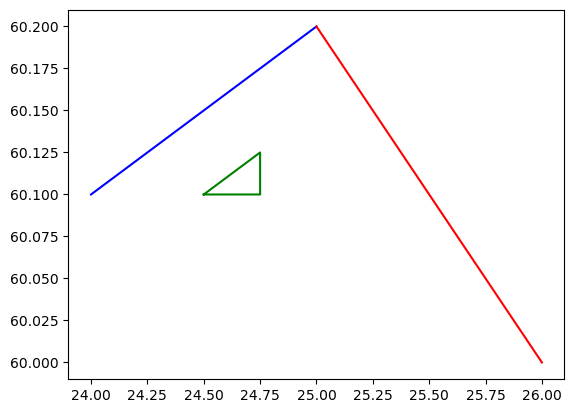

In [50]:
fig, ax = plt.subplots(1)

ax.plot(*line_1.xy,'b')
ax.plot(*line_2.xy,'r')
plt.plot(*polygon1.exterior.xy, 'g')

In [2]:
## Working with Geopandas

# Load our vector
data = gpd.read_file("census/cb_2018_us_state_500k.shp")

#Vizualize the data
data.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


<AxesSubplot:>

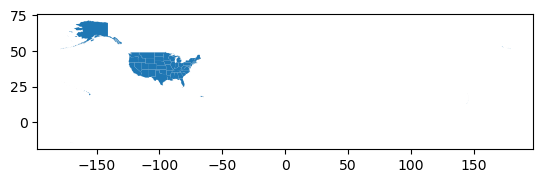

In [12]:
data.plot()

(10.0, 80.0)

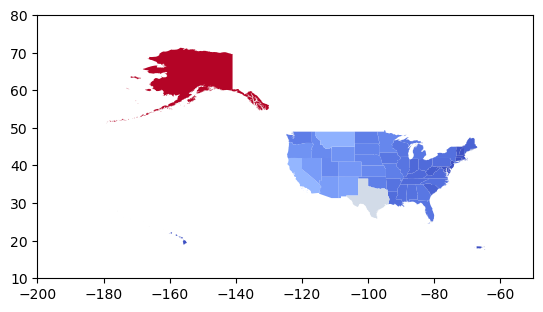

In [14]:
data.plot(column='ALAND', cmap='coolwarm', legend=False)
plt.xlim(-200,-50)
plt.ylim(10,80)

<AxesSubplot:>

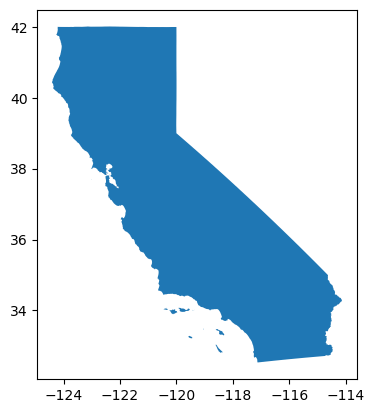

In [9]:
california = data[data['NAME']=='California']
california.plot()

In [43]:
# Check the crs
california.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [3]:
## East San Diego
# Load our vector
ESD = gpd.read_file("EastSanDiego/EastSanDiego.shp")
#Vizualize the data
ESD.head()

,id,Place,Date,geometry
0,1,East San Diego,2023-05-29,"POLYGON ((-116.61577 33.35884, -115.99883 33.3..."


In [11]:
print(california.crs)
print(ESD.crs)

EPSG:4269
EPSG:4269


In [10]:
ESD = ESD.to_crs('EPSG:4269')
print(ESD.crs)

EPSG:4269


<AxesSubplot:>

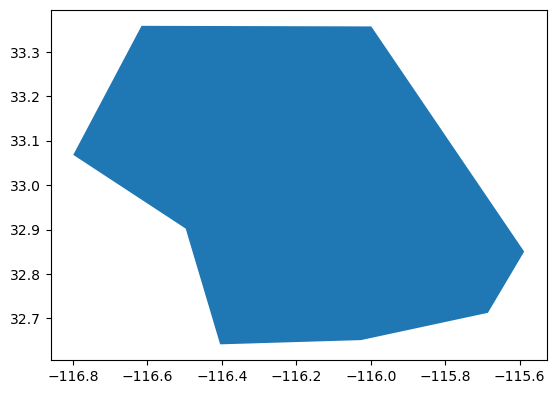

In [79]:
ESD.plot()

(-118.0, -114.0)

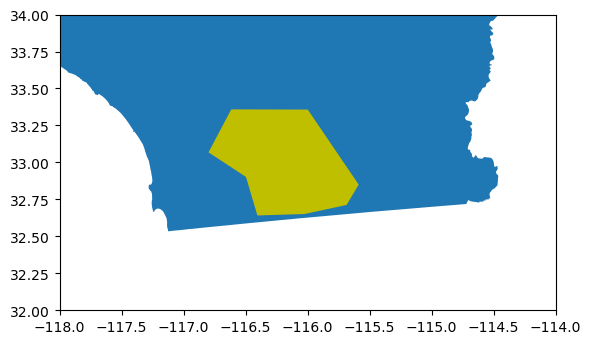

In [12]:
#plot both!
fig, ax = plt.subplots(1)

california.plot(ax=ax)
ESD.plot(ax=ax, color='y')
plt.ylim(32,34)
plt.xlim(-118,-114)

In [4]:
snake = pd.read_csv("crotalus.csv")
snake['geometry'] = gpd.points_from_xy(snake.decimalLongitude, snake.decimalLatitude)
snake.head()
geo_snake = gpd.GeoDataFrame(snake, geometry='geometry', crs = 'EPSG:4269')
#Vizualize the data
geo_snake.head()

,Unnamed: 0,id,occurrenceID,basisOfRecord,modified,institutionCode,collectionCode,datasetName,informationWithheld,catalogNumber,...,phylum,class,order,family,genus,license,rights,rightsHolder,inaturalistLogin,geometry
0,0,679,http://www.inaturalist.org/observations/679,HumanObservation,2020-09-14 11:53:33,iNaturalist,Observations,iNaturalist research-grade observations,NaN,679,...,Chordata,Reptilia,Squamata,Viperidae,Crotalus,http://creativecommons.org/publicdomain/zero/1.0/,By Ken-ichi Ueda no rights reserved,Ken-ichi Ueda,kueda,POINT (-121.98900 37.89630)
1,1,3318,http://www.inaturalist.org/observations/3318,HumanObservation,2020-09-14 11:53:31,iNaturalist,Observations,iNaturalist research-grade observations,NaN,3318,...,Chordata,Reptilia,Squamata,Viperidae,Crotalus,http://creativecommons.org/publicdomain/zero/1.0/,By Ken-ichi Ueda no rights reserved,Ken-ichi Ueda,kueda,POINT (-121.95778 37.87261)
2,2,11917,http://www.inaturalist.org/observations/11917,HumanObservation,2020-07-29 18:29:48,iNaturalist,Observations,iNaturalist research-grade observations,NaN,11917,...,Chordata,Reptilia,Squamata,Viperidae,Crotalus,http://creativecommons.org/licenses/by-nc/4.0/,© Sam McNally some rights reserved,Sam McNally,biosam,POINT (-116.10415 35.14218)
3,3,11937,http://www.inaturalist.org/observations/11937,HumanObservation,2020-07-29 08:08:36,iNaturalist,Observations,iNaturalist research-grade observations,NaN,11937,...,Chordata,Reptilia,Squamata,Viperidae,Crotalus,http://creativecommons.org/licenses/by-nc/4.0/,© Sam McNally some rights reserved,Sam McNally,biosam,POINT (-115.47336 35.01099)
4,4,11940,http://www.inaturalist.org/observations/11940,HumanObservation,2020-05-02 06:35:57,iNaturalist,Observations,iNaturalist research-grade observations,NaN,11940,...,Chordata,Reptilia,Squamata,Viperidae,Crotalus,http://creativecommons.org/licenses/by-nc/4.0/,© Sam McNally some rights reserved,Sam McNally,biosam,POINT (-115.76309 33.71272)


In [51]:
snake.columns

Index(['Unnamed: 0', 'id', 'occurrenceID', 'basisOfRecord', 'modified',
       'institutionCode', 'collectionCode', 'datasetName',
       'informationWithheld', 'catalogNumber', 'references',
       'occurrenceRemarks', 'occurrenceDetails', 'recordedBy', 'recordedByID',
       'identifiedBy', 'identifiedByID', 'establishmentMeans', 'eventDate',
       'eventTime', 'verbatimEventDate', 'verbatimLocality', 'decimalLatitude',
       'decimalLongitude', 'coordinateUncertaintyInMeters', 'countryCode',
       'stateProvince', 'identificationID', 'dateIdentified',
       'identificationRemarks', 'taxonID', 'scientificName', 'taxonRank',
       'kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'license',
       'rights', 'rightsHolder', 'inaturalistLogin'],
      dtype='object')

(-118.0, -114.0)

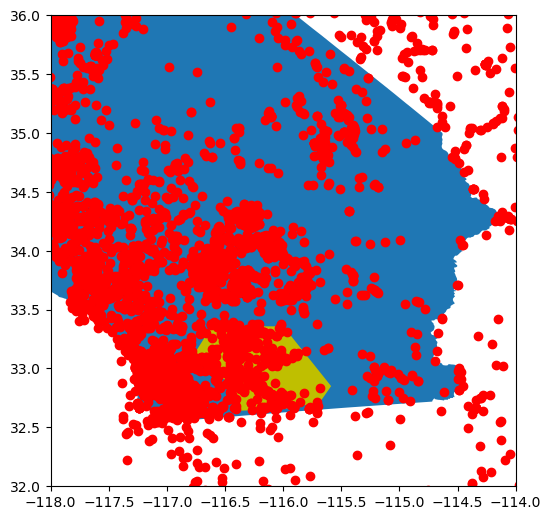

In [82]:
#plot Everything!
fig, ax = plt.subplots(1,figsize=(6,10))

california.plot(ax=ax)
ESD.plot(ax=ax, color='y')
geo_snake.plot(ax=ax, color = 'r')
plt.ylim(32,36)
plt.xlim(-118,-114)

In [7]:
# within
geo_snake['snake_esd'] = [i.within(ESD['geometry'][0]) for i in geo_snake.geometry]
geo_snake.head()
cali_desert_snake = geo_snake[geo_snake.snake_esd==True]
cali_desert_snake.head()

,Unnamed: 0,id,occurrenceID,basisOfRecord,modified,institutionCode,collectionCode,datasetName,informationWithheld,catalogNumber,...,class,order,family,genus,license,rights,rightsHolder,inaturalistLogin,geometry,snake_esd
294,294,316044,http://www.inaturalist.org/observations/316044,HumanObservation,2020-07-29 08:07:10,iNaturalist,Observations,iNaturalist research-grade observations,NaN,316044,...,Reptilia,Squamata,Viperidae,Crotalus,http://creativecommons.org/licenses/by/4.0/,© John Sullivan some rights reserved,John Sullivan,sullivanribbit,POINT (-116.37501 33.25587),True
295,295,316048,http://www.inaturalist.org/observations/316048,HumanObservation,2020-08-25 17:33:35,iNaturalist,Observations,iNaturalist research-grade observations,NaN,316048,...,Reptilia,Squamata,Viperidae,Crotalus,http://creativecommons.org/licenses/by/4.0/,© John Sullivan some rights reserved,John Sullivan,sullivanribbit,POINT (-116.43820 33.07734),True
296,296,318575,http://www.inaturalist.org/observations/318575,HumanObservation,2020-08-25 17:33:36,iNaturalist,Observations,iNaturalist research-grade observations,NaN,318575,...,Reptilia,Squamata,Viperidae,Crotalus,http://creativecommons.org/licenses/by/4.0/,© John Sullivan some rights reserved,John Sullivan,sullivanribbit,POINT (-116.42761 33.21341),True
332,332,337697,http://www.inaturalist.org/observations/337697,HumanObservation,2019-04-13 08:28:36,iNaturalist,Observations,iNaturalist research-grade observations,NaN,337697,...,Reptilia,Squamata,Viperidae,Crotalus,http://creativecommons.org/licenses/by/4.0/,© John Sullivan some rights reserved,John Sullivan,sullivanribbit,POINT (-116.30676 33.26797),True
349,349,348728,http://www.inaturalist.org/observations/348728,HumanObservation,2020-07-29 08:06:45,iNaturalist,Observations,iNaturalist research-grade observations,NaN,348728,...,Reptilia,Squamata,Viperidae,Crotalus,http://creativecommons.org/licenses/by/4.0/,© John Sullivan some rights reserved,John Sullivan,sullivanribbit,POINT (-116.14222 33.28790),True


(-118.0, -114.0)

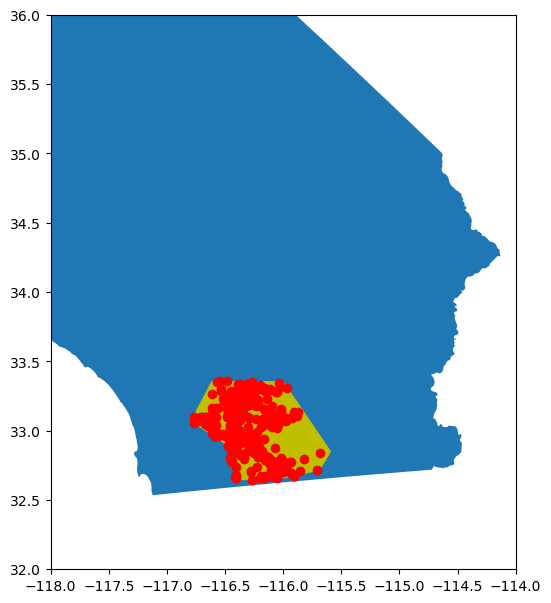

In [13]:
#plot Everything!
fig, ax = plt.subplots(1,figsize=(6,10))

california.plot(ax=ax)
ESD.plot(ax=ax, color='y')
cali_desert_snake.plot(ax=ax, color = 'r')
plt.ylim(32,36)
plt.xlim(-118,-114)

In [106]:
help(leaf.map)

Help on module folium.map in folium:

NAME
    folium.map - Classes for drawing maps.

CLASSES
    branca.element.Element(builtins.object)
        Popup
    branca.element.MacroElement(branca.element.Element)
        CustomPane
        FitBounds
        Icon
        Layer
            FeatureGroup
        LayerControl
        Marker
        Tooltip
    
    class CustomPane(branca.element.MacroElement)
     |  CustomPane(name, z_index=625, pointer_events=False)
     |  
     |  Creates a custom pane to hold map elements.
     |  
     |  Behavior is as in https://leafletjs.com/examples/map-panes/
     |  
     |  Parameters
     |  ----------
     |  name: string
     |      Name of the custom pane. Other map elements can be added
     |      to the pane by specifying the 'pane' kwarg when constructing
     |      them.
     |  z_index: int or string, default 625
     |      The z-index that will be associated with the pane, and will
     |      determine which map elements lie over/und

In [22]:
#folium
zoom = 7
centerpoint=[33, -118.5542] ### Orients the map when you bring it up
map_ = leaf.Map(centerpoint,tiles="stamenterrain",zoom_start=zoom) 
map_

In [23]:
leaf.Choropleth(
        geo_data= ESD['geometry'],
        name = 'Study Site',
        #data = House_gdf,
        #columns=['NAMELSAD'],
        #key_on='GEOID',
        fill_color='blue',
        fill_opacity=0.2,
        line_opacity=1,
        line_color='blue',
        legend_name='Study Site'
        ).add_to(map_)
map_

In [148]:
# add marker one by one on the map
for i in range(0,len(cali_desert_snake)):
    leaf.Marker(
     location=[cali_desert_snake.iloc[i]['geometry'].y, cali_desert_snake.iloc[i]['geometry'].x],
     popup=cali_desert_snake.iloc[i]['scientificName'].title(),
    ).add_to(map_)
map_

In [ ]:
#"C:\Users\micha\Documents\GradQuant\Workshops\GIS_in_Python_workshop\rs_edit.png"

In [24]:
# Custom markers

for i in range(0,len(cali_desert_snake)):
    snake_img = leaf.features.CustomIcon('rs_edit.png', icon_size=(30,30))
    leaf.Marker(
     location=[cali_desert_snake.iloc[i]['geometry'].y, cali_desert_snake.iloc[i]['geometry'].x],
     popup=cali_desert_snake.iloc[i]['scientificName'].title(),
     icon=snake_img
    ).add_to(map_)


In [25]:
map_.save('snake.html')